In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pandas as pd
import cufflinks as cf
import sklearn
from sklearn import svm, preprocessing 
import seaborn as sns
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import os

In [2]:
df = pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


[]

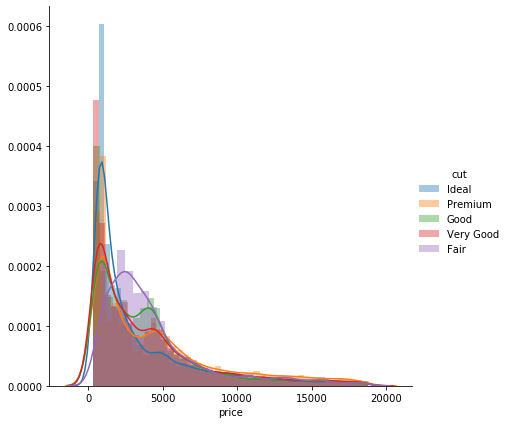

In [3]:
sns.FacetGrid(df, hue = 'cut', height = 6).map(sns.distplot, 'price').add_legend()
plt.plot()

In [4]:
cut_dict = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Premium' : 4, 'Ideal' : 5}
clarity_dict ={ 'I1' : 1, 'SI2' : 2, 'SI1' : 3, 'VS2' : 4, 'VS1' : 5, 'VVS2' : 6, 'VVS1' : 7 , 'IF' : 8}
color_dict = {'D':7, 'E':6, 'F':5, 'G':4, 'H':3, 'I':2, 'J':1}

In [5]:
df['cut'] = df['cut'].map(cut_dict)
df['clarity'] = df['clarity'].map(clarity_dict)
df['color'] = df['color'].map(color_dict)
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


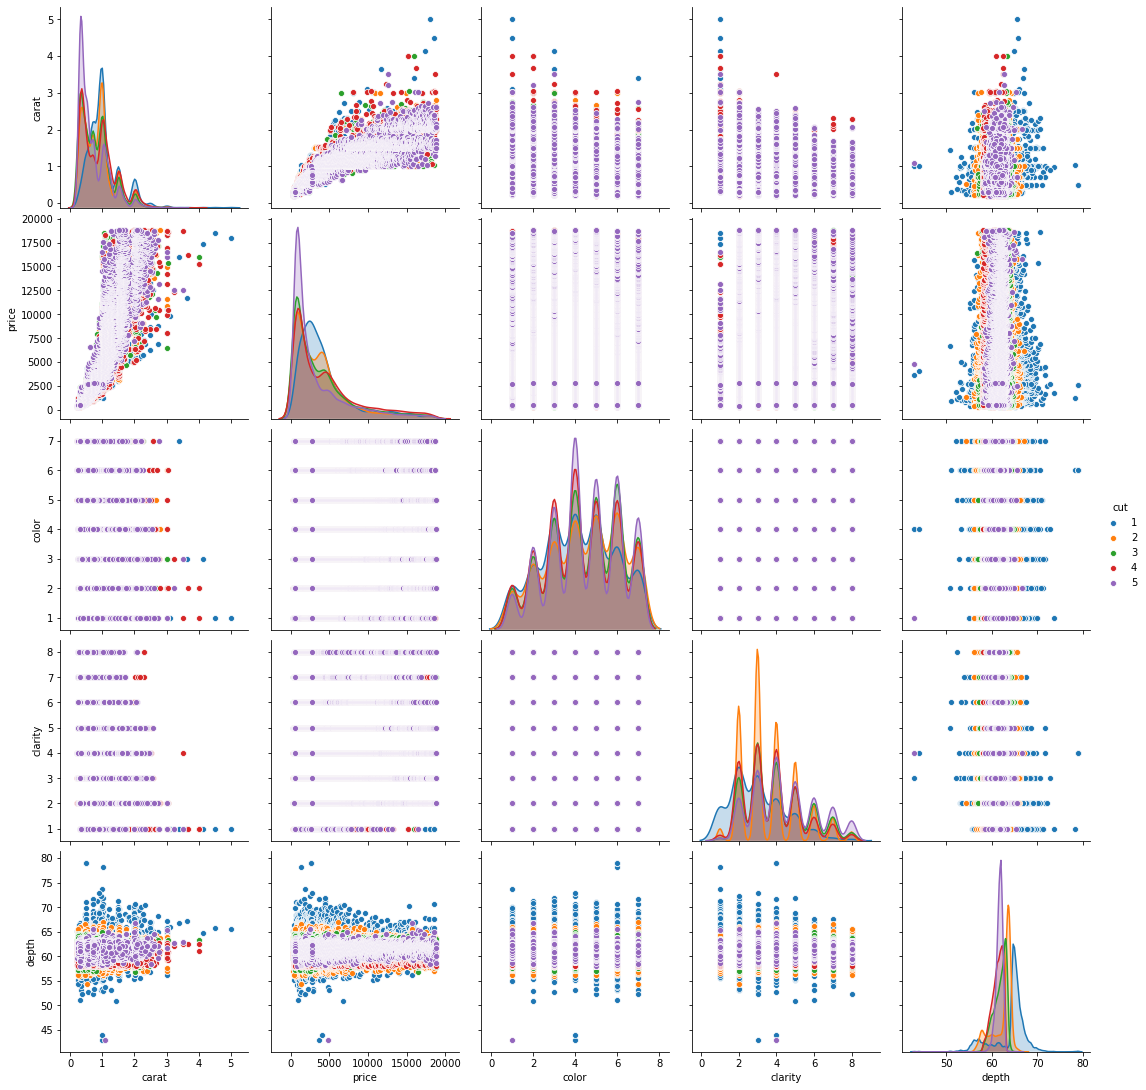

In [6]:
sns.pairplot(df[['carat','price', 'cut', 'color', 'clarity', 'depth']], hue = 'cut', height = 3)

In [7]:
df.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

In [8]:
df = sklearn.utils.shuffle(df, random_state = 42)
X = df.drop(['price'], axis = 1).values
X = preprocessing.scale(X)
y = df['price'].values
y = preprocessing.scale(y)

In [9]:
test_size = 200
X_train = X[: -test_size]
y_train = y[: -test_size]
X_test = X[-test_size :]
y_test =  y[-test_size :]

In [10]:
from sklearn.neighbors import KNeighborsRegressor
score = []
for k in range(1,20):   # running for different K values to know which yields the max accuracy. 
    clf = KNeighborsRegressor(n_neighbors = k,  weights = 'distance', p=1)
    clf.fit(X_train, y_train)
    score.append(clf.score(X_test, y_test ))

In [11]:
trace0 = go.Scatter(
    y = score,
    x = np.arange(1,len(score)+1), 
    mode = 'lines+markers', 
    marker = dict(
        color = 'rgb(100, 200, 150)'
    )
)
layout = go.Layout(
    title = '', 
    xaxis = dict(
        title = 'K value', 
        tickmode = 'linear'
    ),
    yaxis = dict(
        title = 'Score',
#         range = [0, 10000]
    )
)
fig = go.Figure(data = [trace0], layout = layout)
iplot(fig, filename='basic-line')

In [12]:
k_max = score.index(max(score))+1
print( "At K = {}, Max Accuracy = {}".format(k_max, max(score)*100))

At K = 4, Max Accuracy = 98.04928158781551


In [17]:
clf = KNeighborsRegressor(n_neighbors = 50)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test ))   
y_pred = clf.predict(X_test)

0.9543611406331687


In [20]:
trace0 = go.Scatter(
    y = y_test,
    x = np.arange(200), 
    mode = 'lines+markers', 
    name = 'Actual Price',
    marker = dict(
    color = 'rgb(110, 10, 150)')
)

trace1 = go.Scatter(
    y = y_pred,
    x = np.arange(200), 
    mode = 'lines+markers', 
    name = 'Predicted Price',
    line = dict(
        color = 'rgb(200, 50, 10)',
        dash = 'dot'
    )
)


layout = go.Layout(
    xaxis = dict(title = 'Index'), 
    yaxis = dict(title = 'Normalized Price')
)

figure = go.Figure(data = [trace1], layout = layout)
iplot(figure)